In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform, jaccard

Datos:
  Objeto  Var1  Var2
0      A     2     4
1      B     3     5
2      C     5     2
3      D     8     1
4      E     9     3

Matriz de distancias (Euclidiana):
Objeto         A         B         C         D         E
Objeto                                                  
A       0.000000  1.414214  3.605551  6.708204  7.071068
B       1.414214  0.000000  3.605551  6.403124  6.324555
C       3.605551  3.605551  0.000000  3.162278  4.123106
D       6.708204  6.403124  3.162278  0.000000  2.236068
E       7.071068  6.324555  4.123106  2.236068  0.000000


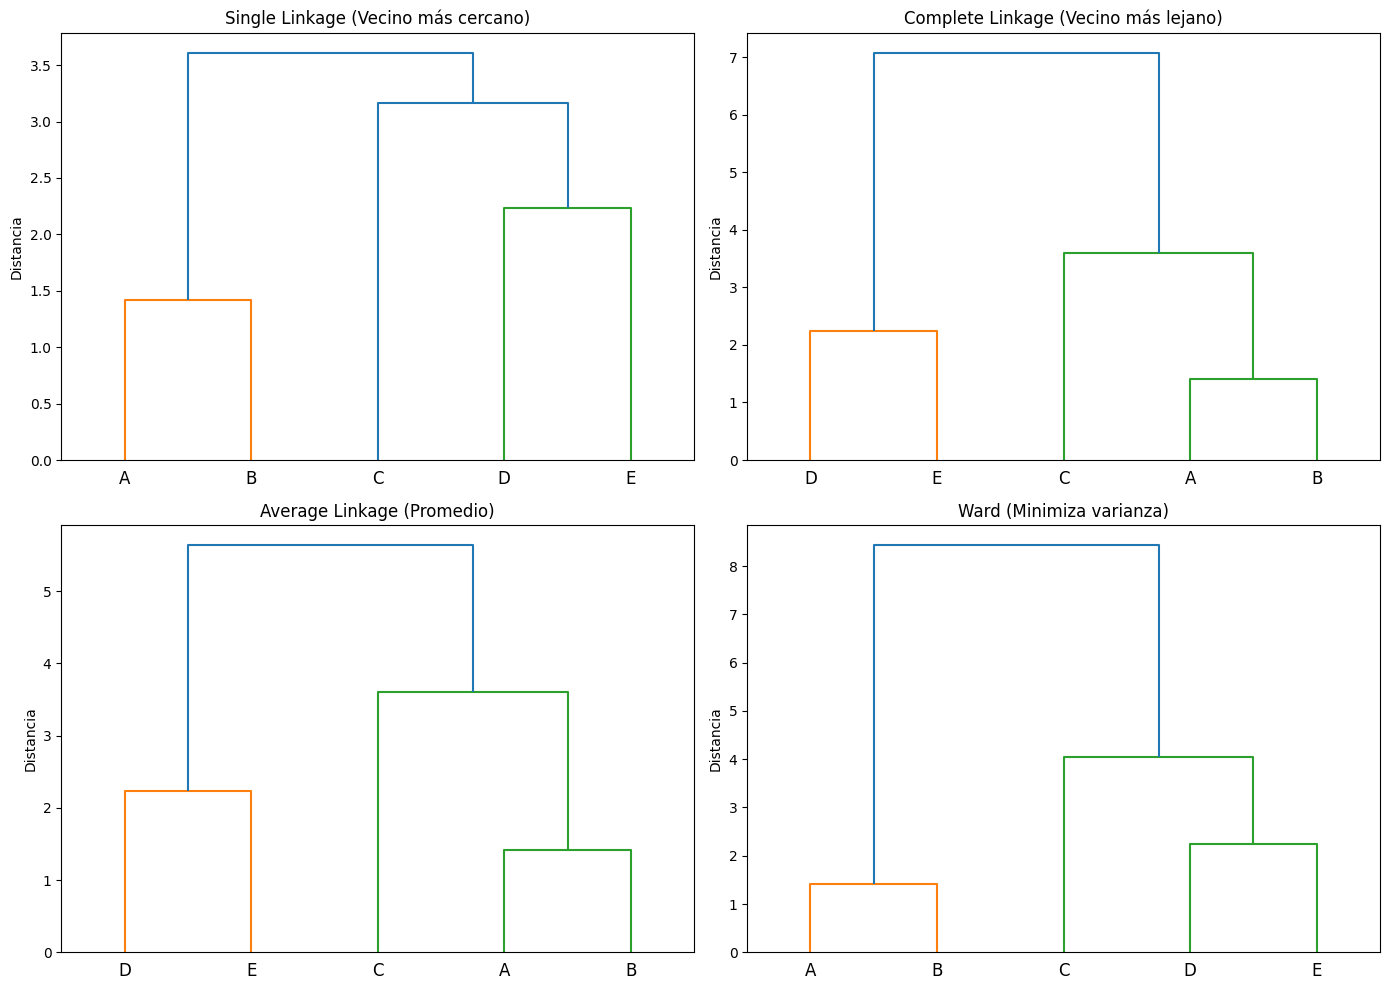


Asignación de clusters (Ward, k=2):
  Objeto  Var1  Var2  Cluster
0      A     2     4        1
1      B     3     5        1
2      C     5     2        2
3      D     8     1        2
4      E     9     3        2


In [2]:


# ============================================
# DATOS DE EJEMPLO
# ============================================
datos = {
    'Objeto': ['A', 'B', 'C', 'D', 'E'],
    'Var1': [2, 3, 5, 8, 9],
    'Var2': [4, 5, 2, 1, 3]
}
df = pd.DataFrame(datos)
print("Datos:")
print(df)

# ============================================
# CALCULAR MATRIZ DE DISTANCIAS
# ============================================
# Extraer solo las variables numéricas
X = df[['Var1', 'Var2']].values

# Calcular distancias euclidianas
distancias = pdist(X, metric='euclidean')
matriz_distancias = squareform(distancias)

print("\nMatriz de distancias (Euclidiana):")
print(pd.DataFrame(matriz_distancias, 
                   index=df['Objeto'], 
                   columns=df['Objeto']))

# ============================================
# CLUSTERING JERÁRQUICO
# ============================================
# Métodos disponibles: 'single', 'complete', 'average', 'ward'
Z_single = linkage(X, method='single', metric='euclidean')
Z_complete = linkage(X, method='complete', metric='euclidean')
Z_average = linkage(X, method='average', metric='euclidean')
Z_ward = linkage(X, method='ward')

# ============================================
# DENDROGRAMAS
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Single Linkage
axes[0, 0].set_title('Single Linkage (Vecino más cercano)')
dendrogram(Z_single, labels=df['Objeto'].values, ax=axes[0, 0])
axes[0, 0].set_ylabel('Distancia')

# Complete Linkage
axes[0, 1].set_title('Complete Linkage (Vecino más lejano)')
dendrogram(Z_complete, labels=df['Objeto'].values, ax=axes[0, 1])
axes[0, 1].set_ylabel('Distancia')

# Average Linkage
axes[1, 0].set_title('Average Linkage (Promedio)')
dendrogram(Z_average, labels=df['Objeto'].values, ax=axes[1, 0])
axes[1, 0].set_ylabel('Distancia')

# Ward
axes[1, 1].set_title('Ward (Minimiza varianza)')
dendrogram(Z_ward, labels=df['Objeto'].values, ax=axes[1, 1])
axes[1, 1].set_ylabel('Distancia')

plt.tight_layout()
plt.savefig('dendrogramas.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# ASIGNAR CLUSTERS (cortando el dendrograma)
# ============================================
from scipy.cluster.hierarchy import fcluster

# Cortar en 2 clusters
clusters = fcluster(Z_ward, 2, criterion='maxclust')
df['Cluster'] = clusters
print("\nAsignación de clusters (Ward, k=2):")
print(df)

Datos binarios:
  Sitio  Jaguar  Tapir  Mono  Venado  Jabalí
0     A       1      0     1       1       0
1     B       1      1     0       1       0
2     C       0      0     1       0       1
3     D       0      1     0       1       0

Matriz de distancias (Jaccard):
Sitio     A         B     C         D
Sitio                                
A      0.00  0.500000  0.75  0.750000
B      0.50  0.000000  1.00  0.333333
C      0.75  1.000000  0.00  1.000000
D      0.75  0.333333  1.00  0.000000

Matriz de distancias (Simple Matching):
Sitio    A    B    C    D
Sitio                    
A      0.0  0.4  0.6  0.6
B      0.4  0.0  1.0  0.2
C      0.6  1.0  0.0  0.8
D      0.6  0.2  0.8  0.0


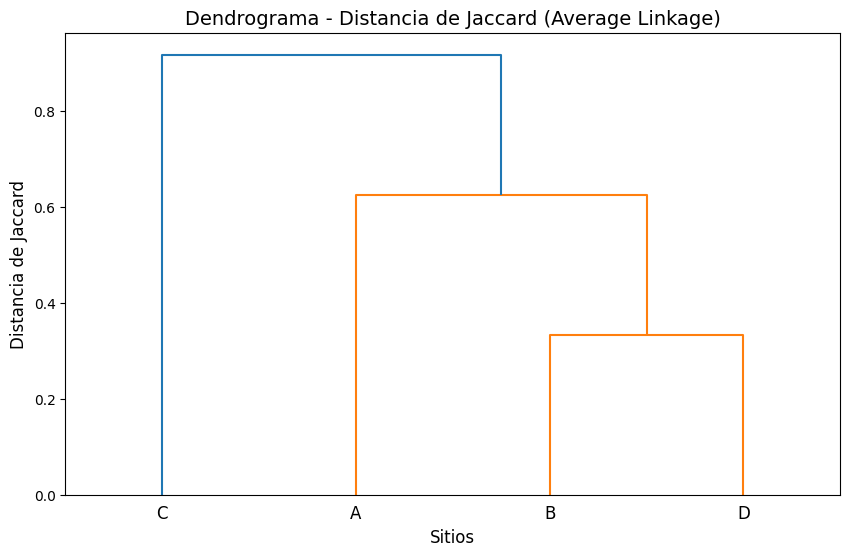

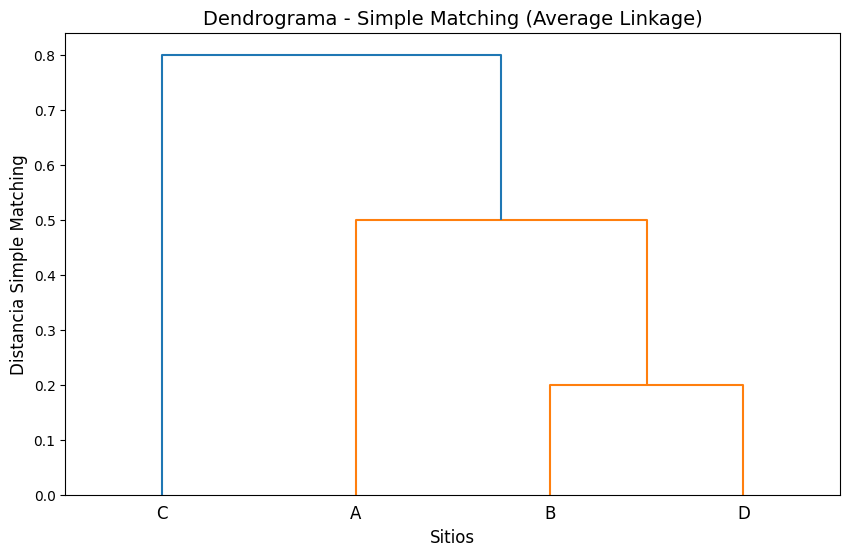

In [4]:


# ============================================
# DATOS BINARIOS (Especies en sitios)
# ============================================
datos_binarios = {
    'Sitio': ['A', 'B', 'C', 'D'],
    'Jaguar': [1, 1, 0, 0],
    'Tapir': [0, 1, 0, 1],
    'Mono': [1, 0, 1, 0],
    'Venado': [1, 1, 0, 1],
    'Jabalí': [0, 0, 1, 0]
}
df_binario = pd.DataFrame(datos_binarios)
print("Datos binarios:")
print(df_binario)

# ============================================
# EXTRAER VARIABLES BINARIAS
# ============================================
X_binario = df_binario[['Jaguar', 'Tapir', 'Mono', 'Venado', 'Jabalí']].values

# ============================================
# CALCULAR SIMILITUDES Y DISTANCIAS
# ============================================

# Opción 1: JACCARD (ignora 0-0)
distancias_jaccard = pdist(X_binario, metric='jaccard')
matriz_jaccard = squareform(distancias_jaccard)

print("\nMatriz de distancias (Jaccard):")
print(pd.DataFrame(matriz_jaccard, 
                   index=df_binario['Sitio'], 
                   columns=df_binario['Sitio']))

# Opción 2: SIMPLE MATCHING (considera 0-0)
# Simple Matching = 1 - proporción de coincidencias
def simple_matching_distance(u, v):
    """Calcula distancia Simple Matching"""
    coincidencias = np.sum(u == v)
    total = len(u)
    similitud = coincidencias / total
    distancia = 1 - similitud
    return distancia

distancias_sm = pdist(X_binario, metric=simple_matching_distance)
matriz_sm = squareform(distancias_sm)

print("\nMatriz de distancias (Simple Matching):")
print(pd.DataFrame(matriz_sm, 
                   index=df_binario['Sitio'], 
                   columns=df_binario['Sitio']))

# ============================================
# CLUSTERING CON JACCARD
# ============================================
Z_jaccard = linkage(distancias_jaccard, method='average')

# ============================================
# DENDROGRAMA JACCARD
# ============================================
plt.figure(figsize=(10, 6))
plt.title('Dendrograma - Distancia de Jaccard (Average Linkage)', fontsize=14)
dendrogram(Z_jaccard, labels=df_binario['Sitio'].values)
plt.ylabel('Distancia de Jaccard', fontsize=12)
plt.xlabel('Sitios', fontsize=12)
plt.savefig('dendrograma_jaccard.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# CLUSTERING CON SIMPLE MATCHING
# ============================================
Z_sm = linkage(distancias_sm, method='average')

plt.figure(figsize=(10, 6))
plt.title('Dendrograma - Simple Matching (Average Linkage)', fontsize=14)
dendrogram(Z_sm, labels=df_binario['Sitio'].values)
plt.ylabel('Distancia Simple Matching', fontsize=12)
plt.xlabel('Sitios', fontsize=12)
plt.savefig('dendrograma_simple_matching.png', dpi=300, bbox_inches='tight')
plt.show()

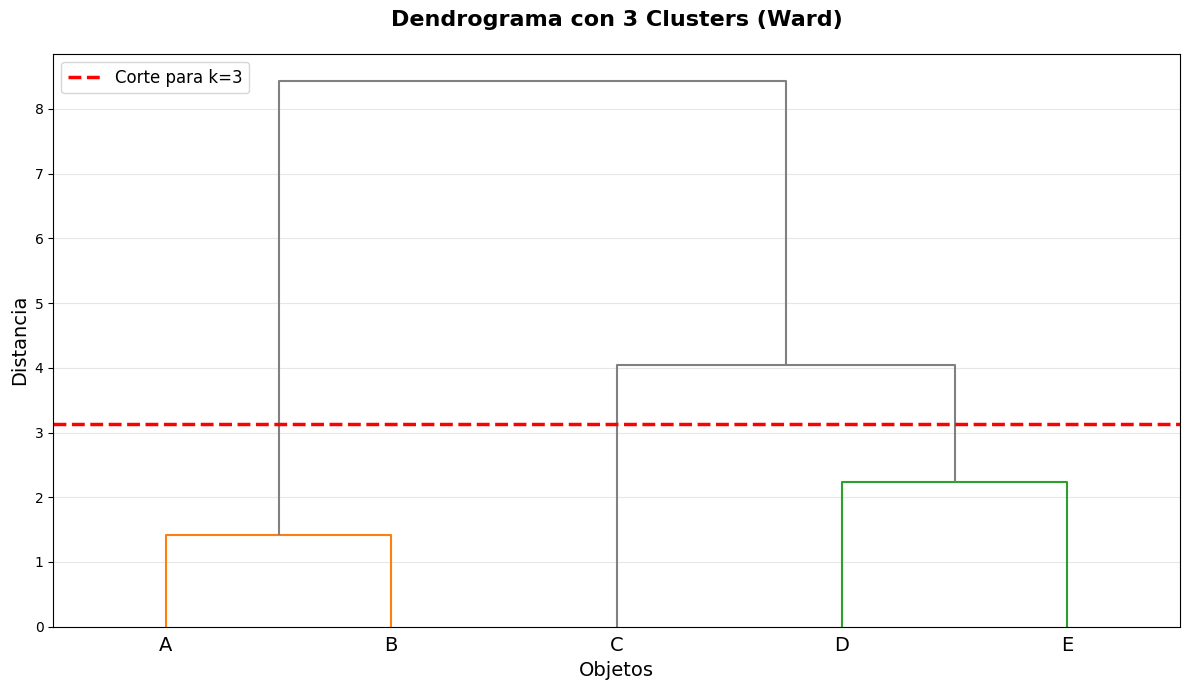


Número de clusters formados: 3
Distancia de corte: 3.14

Asignación de clusters:
  Objeto  Var1  Var2  Cluster
0      A     2     4        1
1      B     3     5        1
2      C     5     2        3
3      D     8     1        2
4      E     9     3        2


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cut_tree

# ============================================
# DATOS DE EJEMPLO
# ============================================
datos = {
    'Objeto': ['A', 'B', 'C', 'D', 'E'],
    'Var1': [2, 3, 5, 8, 9],
    'Var2': [4, 5, 2, 1, 3]
}
df = pd.DataFrame(datos)
X = df[['Var1', 'Var2']].values

# ============================================
# CLUSTERING
# ============================================
Z = linkage(X, method='ward')

# ============================================
# ELEGIR NÚMERO DE CLUSTERS
# ============================================
num_clusters = 3 # ← CAMBIA ESTE NÚMERO

# ============================================
# DENDROGRAMA CON CLUSTERS COLOREADOS
# ============================================
plt.figure(figsize=(12, 7))

# Calcular la distancia de corte para ese número de clusters
if num_clusters > 1:
    distancia_corte = (Z[-(num_clusters-1), 2] + Z[-num_clusters, 2]) / 2
else:
    distancia_corte = Z[-1, 2]

# Dibujar dendrograma con colores automáticos
dendro = dendrogram(Z, 
                    labels=df['Objeto'].values,
                    color_threshold=distancia_corte,  # ← Colorea automáticamente
                    above_threshold_color='#808080',  # Color para ramas unificadas
                    leaf_font_size=14)

# Línea de corte
plt.axhline(y=distancia_corte, color='red', linestyle='--', 
            linewidth=2.5, label=f'Corte para k={num_clusters}')

plt.title(f'Dendrograma con {num_clusters} Clusters (Ward)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Objetos', fontsize=14)
plt.ylabel('Distancia', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# ASIGNAR Y MOSTRAR CLUSTERS
# ============================================
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
df['Cluster'] = clusters

print(f"\nNúmero de clusters formados: {num_clusters}")
print(f"Distancia de corte: {distancia_corte:.2f}\n")
print("Asignación de clusters:")
print(df)

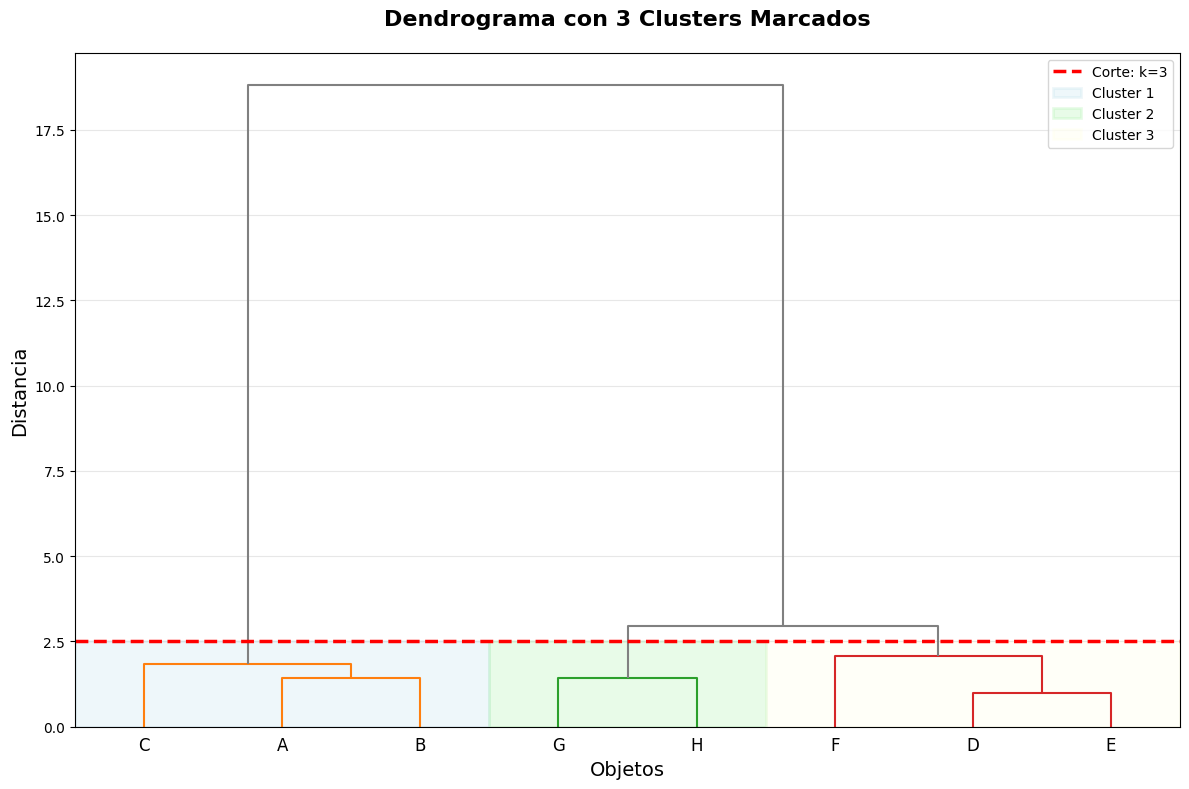


Asignación de clusters (k=3):
  Objeto  Var1  Var2  Cluster
0      A     1     2        1
1      B     2     1        1
2      C     2     3        1
3      D     8     8        3
4      E     8     9        3
5      F     9     7        3
6      G     9    10        2
7      H    10     9        2


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# ============================================
# DATOS DE EJEMPLO
# ============================================
datos = {
    'Objeto': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Var1': [1, 2, 2, 8, 8, 9, 9, 10],
    'Var2': [2, 1, 3, 8, 9, 7, 10, 9]
}
df = pd.DataFrame(datos)
X = df[['Var1', 'Var2']].values

# ============================================
# CLUSTERING
# ============================================
Z = linkage(X, method='ward')

# ============================================
# ELEGIR NÚMERO DE CLUSTERS
# ============================================
num_clusters = 3  # ← CAMBIA ESTE NÚMERO

# ============================================
# DENDROGRAMA CON RECTÁNGULOS
# ============================================
from scipy.cluster.hierarchy import dendrogram, fcluster

plt.figure(figsize=(12, 8))

# Calcular distancia de corte
if num_clusters > 1:
    distancia_corte = (Z[-(num_clusters-1), 2] + Z[-num_clusters, 2]) / 2
else:
    distancia_corte = Z[-1, 2]

# Dibujar dendrograma coloreado
dendro = dendrogram(Z,
                    labels=df['Objeto'].values,
                    color_threshold=distancia_corte,
                    above_threshold_color='gray',
                    leaf_font_size=12)

# Línea de corte
plt.axhline(y=distancia_corte, color='red', linestyle='--', 
            linewidth=2.5, label=f'Corte: k={num_clusters}')

# ============================================
# AGREGAR RECTÁNGULOS ALREDEDOR DE CLUSTERS
# ============================================
from scipy.cluster.hierarchy import fcluster

# Obtener clusters
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')

# Obtener posiciones de las hojas en el dendrograma
leaves = dendro['leaves']  # Orden de los objetos en el eje X
icoord = np.array(dendro['icoord'])  # Coordenadas X
dcoord = np.array(dendro['dcoord'])  # Coordenadas Y (distancias)

# Colores para los rectángulos
colores_rect = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'plum']

# Dibujar rectángulo por cluster
for cluster_id in range(1, num_clusters + 1):
    # Encontrar objetos en este cluster
    indices = np.where(clusters == cluster_id)[0]
    
    # Encontrar sus posiciones en el dendrograma
    posiciones = [leaves.index(i) for i in indices]
    
    if len(posiciones) > 0:
        # Calcular límites del rectángulo
        x_min = min(posiciones) * 10  # El dendrograma usa escala 10
        x_max = max(posiciones) * 10 + 10
        y_min = 0
        y_max = distancia_corte
        
        # Dibujar rectángulo
        rect = mpatches.Rectangle((x_min, y_min), 
                                  x_max - x_min, 
                                  y_max - y_min,
                                  linewidth=2,
                                  edgecolor=colores_rect[cluster_id-1],
                                  facecolor=colores_rect[cluster_id-1],
                                  alpha=0.2,
                                  label=f'Cluster {cluster_id}')
        plt.gca().add_patch(rect)

plt.title(f'Dendrograma con {num_clusters} Clusters Marcados', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Objetos', fontsize=14)
plt.ylabel('Distancia', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar asignación
df['Cluster'] = clusters
print(f"\nAsignación de clusters (k={num_clusters}):")
print(df)

CON 2 CLUSTERS:


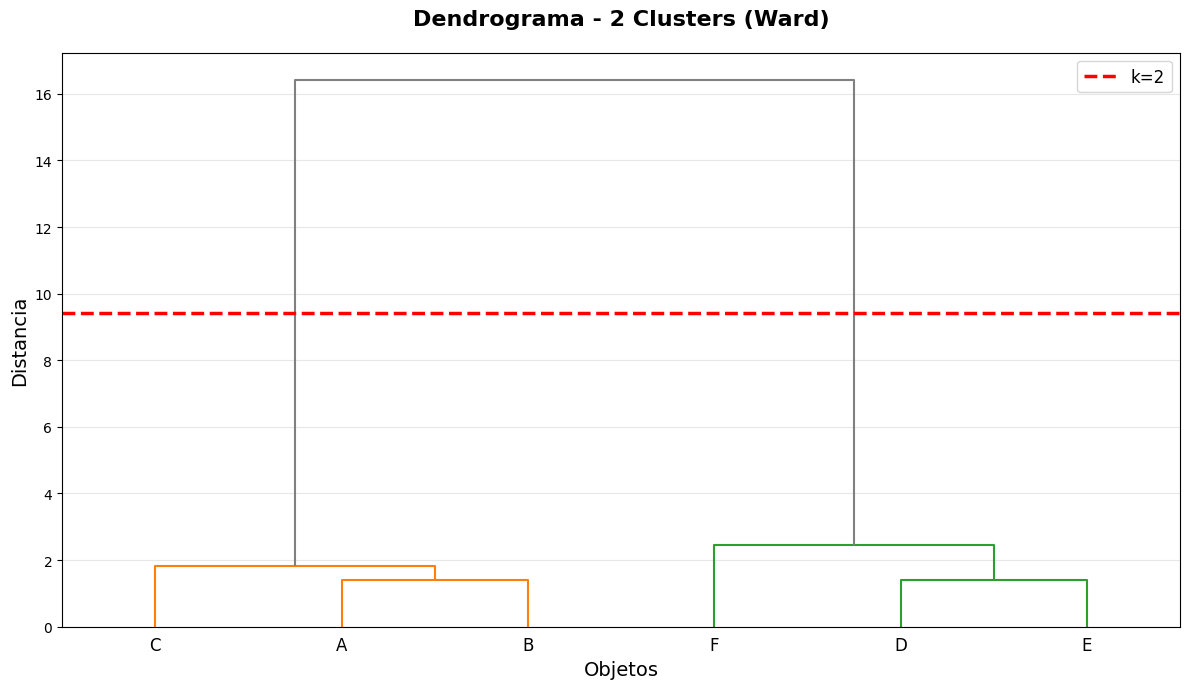


DISTANCIA DE CORTE: 9.43

ASIGNACIÓN DE 2 CLUSTERS:
  Objeto  Cluster
0      A        1
1      B        1
2      C        1
3      D        2
4      E        2
5      F        2

Objetos por cluster:
Cluster
1    3
2    3
Name: count, dtype: int64

CON 3 CLUSTERS:


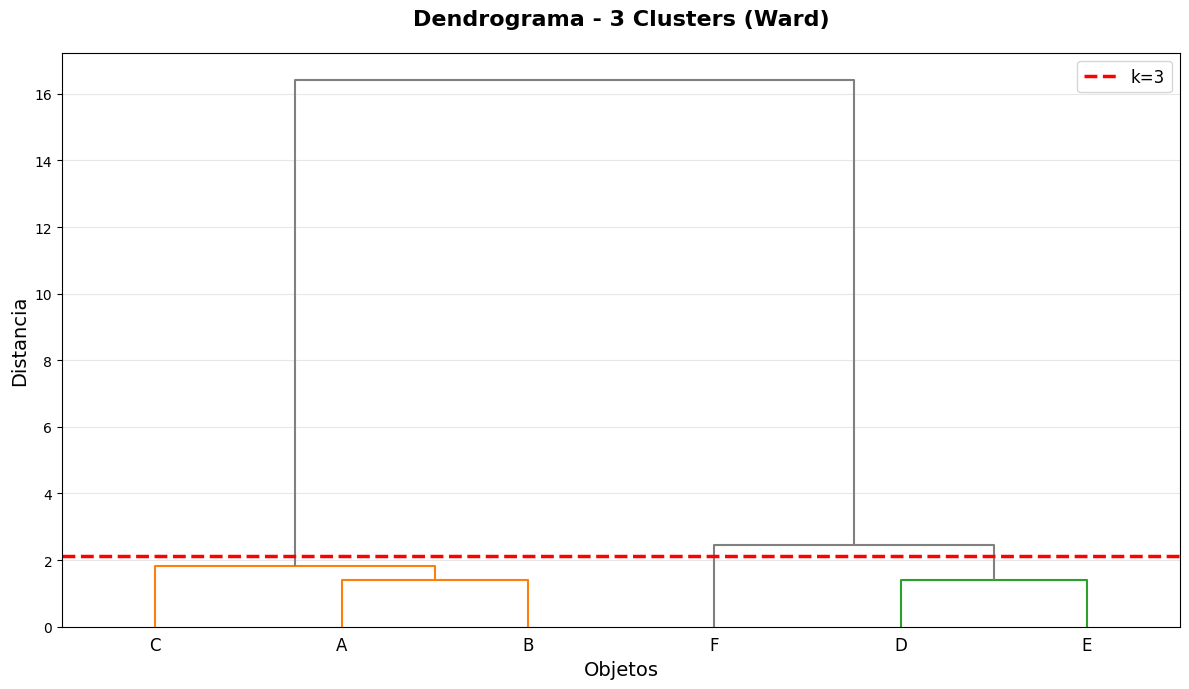


DISTANCIA DE CORTE: 2.14

ASIGNACIÓN DE 3 CLUSTERS:
  Objeto  Cluster
0      A        1
1      B        1
2      C        1
3      D        2
4      E        2
5      F        3

Objetos por cluster:
Cluster
1    3
2    2
3    1
Name: count, dtype: int64


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def dendrograma_con_clusters(X, labels, num_clusters, metodo='ward'):
    """
    Dibuja dendrograma con clusters coloreados
    
    Parámetros:
    - X: matriz de datos
    - labels: etiquetas de los objetos
    - num_clusters: número de clusters a formar
    - metodo: método de enlace ('single', 'complete', 'average', 'ward')
    """
    # Clustering
    Z = linkage(X, method=metodo)
    
    # Calcular distancia de corte
    if num_clusters > 1 and len(Z) >= num_clusters:
        distancia_corte = (Z[-(num_clusters-1), 2] + Z[-num_clusters, 2]) / 2
    else:
        distancia_corte = Z[-1, 2] if len(Z) > 0 else 0
    
    # Dibujar
    plt.figure(figsize=(12, 7))
    
    dendro = dendrogram(Z,
                        labels=labels,
                        color_threshold=distancia_corte,
                        above_threshold_color='gray',
                        leaf_font_size=12)
    
    plt.axhline(y=distancia_corte, color='red', linestyle='--', 
                linewidth=2.5, label=f'k={num_clusters}')
    
    plt.title(f'Dendrograma - {num_clusters} Clusters ({metodo.capitalize()})',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Objetos', fontsize=14)
    plt.ylabel('Distancia', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Asignar clusters
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    
    # Crear DataFrame de resultados
    df_result = pd.DataFrame({
        'Objeto': labels,
        'Cluster': clusters
    })
    
    print(f"\nDISTANCIA DE CORTE: {distancia_corte:.2f}")
    print(f"\nASIGNACIÓN DE {num_clusters} CLUSTERS:")
    print(df_result)
    print(f"\nObjetos por cluster:")
    print(df_result['Cluster'].value_counts().sort_index())
    
    return clusters

# ============================================
# USAR LA FUNCIÓN
# ============================================
datos = {
    'Objeto': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Var1': [1, 2, 2, 8, 9, 10],
    'Var2': [2, 1, 3, 8, 7, 9]
}
df = pd.DataFrame(datos)
X = df[['Var1', 'Var2']].values
labels = df['Objeto'].values

# PRUEBA CON 2 CLUSTERS
print("="*60)
print("CON 2 CLUSTERS:")
print("="*60)
clusters_2 = dendrograma_con_clusters(X, labels, num_clusters=2, metodo='ward')

# PRUEBA CON 3 CLUSTERS
print("\n" + "="*60)
print("CON 3 CLUSTERS:")
print("="*60)
clusters_3 = dendrograma_con_clusters(X, labels, num_clusters=3, metodo='ward')

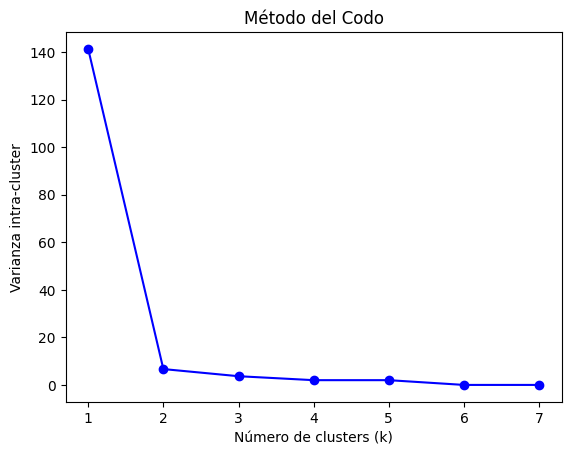

In [14]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

Z = linkage(X, method='complete')

# Calcular varianza intra-cluster para diferentes k
varianzas = []
K_range = range(1, 8)

for k in K_range:
    clusters = fcluster(Z, t=k, criterion='maxclust')
    # Calcular varianza dentro de cada cluster
    varianza_total = 0
    for cluster_id in range(1, k+1):
        puntos_cluster = X[clusters == cluster_id]
        if len(puntos_cluster) > 0:
            centroide = puntos_cluster.mean(axis=0)
            varianza_total += ((puntos_cluster - centroide)**2).sum()
    varianzas.append(varianza_total)

plt.plot(K_range, varianzas, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Varianza intra-cluster')
plt.title('Método del Codo')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Probar diferentes k
for k in range(2, 6):
    clusters = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(X, clusters)
    print(f'k={k}: Silueta = {score:.3f}')

k=2: Silueta = 0.812
k=3: Silueta = 0.531
k=4: Silueta = 0.171
k=5: Silueta = 0.171
